In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from shutil import copyfile
from glob import glob
from json import load, dump
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,\
    Activation
from tensorflow.keras import Model, Sequential
from os.path import basename
from time import time
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
# one-hot encode the training and testing labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

[INFO] loading Fashion MNIST...


In [ ]:
WIDTH = 28
HEIGHT = 28
EPOCHS = 1000
PATIENCE = 50
LR = 0.001
NUM_CLASS = 10
BATCH_SIZE = 32

In [ ]:
filters=10
NUM_CLASS=10
tiny_vgg = Sequential([
    Conv2D(filters, (3, 3), input_shape=(28, 28, 1), name='conv_1_1'),
    Activation('relu', name='relu_1_1'),
    Conv2D(filters, (3, 3), name='conv_1_2'),
    Activation('relu', name='relu_1_2'),
    MaxPool2D((2, 2), name='max_pool_1'),

    Conv2D(filters, (3, 3), name='conv_2_1'),
    Activation('relu', name='relu_2_1'),
    Conv2D(filters, (3, 3), name='conv_2_2'),
    Activation('relu', name='relu_2_2'),
    MaxPool2D((2, 2), name='max_pool_2'),

    Flatten(name='flatten'),
    Dense(NUM_CLASS, activation='softmax', name='output')
])

In [ ]:
LR=0.001
loss_object = tf.keras.losses.CategoricalCrossentropy()
# optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

train_mean_loss = tf.keras.metrics.Mean(name='train_mean_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

vali_mean_loss = tf.keras.metrics.Mean(name='vali_mean_loss')
vali_accuracy = tf.keras.metrics.CategoricalAccuracy(name='vali_accuracy')

In [ ]:
def train_step(image_batch, label_batch):
   with tf.device('/GPU:0'):  
    with tf.GradientTape() as tape:
        # Predict
        predictions = tiny_vgg(image_batch)

        # Update gradient
        loss = loss_object(label_batch, predictions)
        gradients = tape.gradient(loss, tiny_vgg.trainable_variables)
        optimizer.apply_gradients(zip(gradients, tiny_vgg.trainable_variables))

        train_mean_loss(loss)
        train_accuracy(label_batch, predictions)

In [ ]:
def create_batch(trainx,trainy,batch_size):
  dataset=[]
  for i in range(len(trainy)//batch_size ):
    
    if((i+1)*32<len(trainy)):
      trainX=np.array(trainx[i*32:(i+1)*32])
      trainY=np.array(trainy[i*32:(i+1)*32])
    else:
      trainX=np.array(trainx[i*32:])
      trainY=np.array(trainy[i*32:])
    dataset.append((trainX,trainY))
  return dataset
train_dataset=create_batch(trainX,trainY,BATCH_SIZE)

print(len(train_dataset))

1875


In [ ]:
# rain_dataset[0][1].shape

for epoch in range(EPOCHS):
    # Train
    for image_batch, label_batch in train_dataset:
        
        
        train_step(image_batch, label_batch)

    
    
    template = 'epoch: {}, train loss: {:.4f}, train accuracy: {:.4f}, '
    
    print(template.format(epoch + 1,
                          train_mean_loss.result(),
                          train_accuracy.result() * 100))
                          

   
    
    train_mean_loss.reset_states()
    train_accuracy.reset_states()

tiny_vgg.save('trained_tiny_vgg.h5')

epoch: 1, train loss: 0.5615, train accuracy: 79.3837, 
epoch: 2, train loss: 0.3882, train accuracy: 86.0167, 
epoch: 3, train loss: 0.3867, train accuracy: 86.0717, 
epoch: 4, train loss: 0.3852, train accuracy: 86.1100, 
epoch: 5, train loss: 0.3837, train accuracy: 86.1600, 
epoch: 6, train loss: 0.3823, train accuracy: 86.1867, 
epoch: 7, train loss: 0.3809, train accuracy: 86.2600, 
epoch: 8, train loss: 0.3795, train accuracy: 86.2950, 
epoch: 9, train loss: 0.3782, train accuracy: 86.3600, 
epoch: 10, train loss: 0.3769, train accuracy: 86.4400, 
epoch: 11, train loss: 0.3756, train accuracy: 86.4800, 
epoch: 12, train loss: 0.3743, train accuracy: 86.5350, 
epoch: 13, train loss: 0.3731, train accuracy: 86.5917, 
epoch: 14, train loss: 0.3719, train accuracy: 86.6117, 
epoch: 15, train loss: 0.3707, train accuracy: 86.6750, 
epoch: 16, train loss: 0.3695, train accuracy: 86.7250, 
epoch: 17, train loss: 0.3683, train accuracy: 86.7817, 
epoch: 18, train loss: 0.3671, train acc

epoch: 145, train loss: 0.2850, train accuracy: 89.7783, 
epoch: 146, train loss: 0.2846, train accuracy: 89.7900, 
epoch: 147, train loss: 0.2843, train accuracy: 89.8217, 
epoch: 148, train loss: 0.2839, train accuracy: 89.8450, 
epoch: 149, train loss: 0.2835, train accuracy: 89.8617, 
epoch: 150, train loss: 0.2832, train accuracy: 89.8683, 
epoch: 151, train loss: 0.2829, train accuracy: 89.8767, 
epoch: 152, train loss: 0.2825, train accuracy: 89.8800, 
epoch: 153, train loss: 0.2822, train accuracy: 89.8883, 
epoch: 154, train loss: 0.2818, train accuracy: 89.9017, 
epoch: 155, train loss: 0.2815, train accuracy: 89.9267, 
epoch: 156, train loss: 0.2812, train accuracy: 89.9233, 
epoch: 157, train loss: 0.2809, train accuracy: 89.9350, 
epoch: 158, train loss: 0.2805, train accuracy: 89.9467, 
epoch: 159, train loss: 0.2802, train accuracy: 89.9767, 
epoch: 160, train loss: 0.2799, train accuracy: 89.9900, 
epoch: 161, train loss: 0.2796, train accuracy: 89.9833, 
epoch: 162, tr

epoch: 287, train loss: 0.2509, train accuracy: 91.1017, 
epoch: 288, train loss: 0.2508, train accuracy: 91.1100, 
epoch: 289, train loss: 0.2506, train accuracy: 91.1317, 
epoch: 290, train loss: 0.2504, train accuracy: 91.1350, 
epoch: 291, train loss: 0.2503, train accuracy: 91.1450, 
epoch: 292, train loss: 0.2501, train accuracy: 91.1433, 
epoch: 293, train loss: 0.2499, train accuracy: 91.1367, 
epoch: 294, train loss: 0.2498, train accuracy: 91.1417, 
epoch: 295, train loss: 0.2496, train accuracy: 91.1583, 
epoch: 296, train loss: 0.2494, train accuracy: 91.1617, 
epoch: 297, train loss: 0.2493, train accuracy: 91.1650, 
epoch: 298, train loss: 0.2491, train accuracy: 91.1617, 
epoch: 299, train loss: 0.2490, train accuracy: 91.1633, 
epoch: 300, train loss: 0.2488, train accuracy: 91.1767, 
epoch: 301, train loss: 0.2486, train accuracy: 91.1850, 
epoch: 302, train loss: 0.2485, train accuracy: 91.1800, 
epoch: 303, train loss: 0.2483, train accuracy: 91.1683, 
epoch: 304, tr

epoch: 429, train loss: 0.2324, train accuracy: 91.7600, 
epoch: 430, train loss: 0.2323, train accuracy: 91.7717, 
epoch: 431, train loss: 0.2322, train accuracy: 91.7800, 
epoch: 432, train loss: 0.2321, train accuracy: 91.7767, 
epoch: 433, train loss: 0.2320, train accuracy: 91.7817, 
epoch: 434, train loss: 0.2319, train accuracy: 91.7800, 
epoch: 435, train loss: 0.2318, train accuracy: 91.7933, 
epoch: 436, train loss: 0.2317, train accuracy: 91.7850, 
epoch: 437, train loss: 0.2316, train accuracy: 91.7883, 
epoch: 438, train loss: 0.2315, train accuracy: 91.8017, 
epoch: 439, train loss: 0.2314, train accuracy: 91.7967, 
epoch: 440, train loss: 0.2313, train accuracy: 91.8000, 
epoch: 441, train loss: 0.2312, train accuracy: 91.7933, 
epoch: 442, train loss: 0.2311, train accuracy: 91.8083, 
epoch: 443, train loss: 0.2310, train accuracy: 91.8167, 
epoch: 444, train loss: 0.2309, train accuracy: 91.8150, 
epoch: 445, train loss: 0.2308, train accuracy: 91.8267, 
epoch: 446, tr

epoch: 571, train loss: 0.2204, train accuracy: 92.1867, 
epoch: 572, train loss: 0.2203, train accuracy: 92.1833, 
epoch: 573, train loss: 0.2202, train accuracy: 92.1933, 
epoch: 574, train loss: 0.2202, train accuracy: 92.1983, 
epoch: 575, train loss: 0.2201, train accuracy: 92.2050, 
epoch: 576, train loss: 0.2200, train accuracy: 92.2100, 
epoch: 577, train loss: 0.2200, train accuracy: 92.1967, 
epoch: 578, train loss: 0.2199, train accuracy: 92.2067, 
epoch: 579, train loss: 0.2198, train accuracy: 92.2067, 
epoch: 580, train loss: 0.2197, train accuracy: 92.2017, 
epoch: 581, train loss: 0.2197, train accuracy: 92.2083, 
epoch: 582, train loss: 0.2196, train accuracy: 92.2150, 
epoch: 583, train loss: 0.2195, train accuracy: 92.2133, 
epoch: 584, train loss: 0.2194, train accuracy: 92.2183, 
epoch: 585, train loss: 0.2194, train accuracy: 92.2250, 
epoch: 586, train loss: 0.2193, train accuracy: 92.2383, 
epoch: 587, train loss: 0.2192, train accuracy: 92.2400, 
epoch: 588, tr

epoch: 713, train loss: 0.2112, train accuracy: 92.5917, 
epoch: 714, train loss: 0.2112, train accuracy: 92.5833, 
epoch: 715, train loss: 0.2111, train accuracy: 92.5733, 
epoch: 716, train loss: 0.2110, train accuracy: 92.5883, 
epoch: 717, train loss: 0.2110, train accuracy: 92.5967, 
epoch: 718, train loss: 0.2110, train accuracy: 92.5883, 
epoch: 719, train loss: 0.2109, train accuracy: 92.5933, 
epoch: 720, train loss: 0.2108, train accuracy: 92.5833, 
epoch: 721, train loss: 0.2108, train accuracy: 92.5933, 
epoch: 722, train loss: 0.2107, train accuracy: 92.5933, 
epoch: 723, train loss: 0.2107, train accuracy: 92.5950, 
epoch: 724, train loss: 0.2106, train accuracy: 92.5867, 
epoch: 725, train loss: 0.2105, train accuracy: 92.6050, 
epoch: 726, train loss: 0.2105, train accuracy: 92.6117, 
epoch: 727, train loss: 0.2104, train accuracy: 92.6100, 
epoch: 728, train loss: 0.2104, train accuracy: 92.6117, 
epoch: 729, train loss: 0.2103, train accuracy: 92.6083, 
epoch: 730, tr

epoch: 855, train loss: 0.2037, train accuracy: 92.7967, 
epoch: 856, train loss: 0.2036, train accuracy: 92.7900, 
epoch: 857, train loss: 0.2036, train accuracy: 92.8000, 
epoch: 858, train loss: 0.2035, train accuracy: 92.7867, 
epoch: 859, train loss: 0.2035, train accuracy: 92.7883, 
epoch: 860, train loss: 0.2035, train accuracy: 92.7750, 
epoch: 861, train loss: 0.2034, train accuracy: 92.7900, 
epoch: 862, train loss: 0.2033, train accuracy: 92.7850, 
epoch: 863, train loss: 0.2033, train accuracy: 92.7800, 
epoch: 864, train loss: 0.2032, train accuracy: 92.7850, 
epoch: 865, train loss: 0.2032, train accuracy: 92.7933, 
epoch: 866, train loss: 0.2031, train accuracy: 92.7850, 
epoch: 867, train loss: 0.2031, train accuracy: 92.7883, 
epoch: 868, train loss: 0.2030, train accuracy: 92.8000, 
epoch: 869, train loss: 0.2030, train accuracy: 92.8050, 
epoch: 870, train loss: 0.2029, train accuracy: 92.8183, 
epoch: 871, train loss: 0.2029, train accuracy: 92.8183, 
epoch: 872, tr

epoch: 997, train loss: 0.1971, train accuracy: 93.0067, 
epoch: 998, train loss: 0.1971, train accuracy: 93.0033, 
epoch: 999, train loss: 0.1970, train accuracy: 93.0083, 
epoch: 1000, train loss: 0.1970, train accuracy: 93.0050, 


In [ ]:
tiny_vgg.load_weights("trained_tiny_vgg.h5")
test_dataset = create_batch(testX,testY,BATCH_SIZE)
test_mean_loss = tf.keras.metrics.Mean(name='test_mean_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')
def test_step(image_batch, label_batch):
    predictions = tiny_vgg(image_batch)
    test_loss = loss_object(label_batch, predictions)

    test_mean_loss(test_loss)
    test_accuracy(label_batch, predictions)
for image_batch, label_batch in test_dataset:
    test_step(image_batch, label_batch)
template = '\ntest loss: {:.4f}, test accuracy: {:.4f}'
print(template.format(test_mean_loss.result(),
                      test_accuracy.result() * 100))


test loss: 0.2911, test accuracy: 90.1743


In [ ]:
def convert_h5_to_json(model_h5_file, model_json_file):
    """
    Helper function to convert tf2 stored model h5 file to a customized json
    format.
    Args:
        model_h5_file(string): filename of the stored h5 file
        model_json_file(string): filename of the output json file
    """

    model = tf.keras.models.load_model(model_h5_file)
    json_dict = {}

    for l in model.layers:
        json_dict[l.name] = {
            'input_shape': l.input_shape[1:],
            'output_shape': l.output_shape[1:],
            'num_neurons': l.output_shape[-1]
        }

        if 'conv' in l.name:
            all_weights = l.weights[0]
            neuron_weights = []

            # Iterate through neurons in that layer
            for n in range(all_weights.shape[3]):
                cur_neuron_dict = {}
                cur_neuron_dict['bias'] = l.bias.numpy()[n].item()

                # Get the current weights
                cur_weights = all_weights[:, :, :, n].numpy().astype(float)

                # Reshape the weights from (height, width, input_c) to
                # (input_c, height, width)
                cur_weights = cur_weights.transpose((2, 0, 1)).tolist()
                cur_neuron_dict['weights'] = cur_weights

                neuron_weights.append(cur_neuron_dict)

            json_dict[l.name]['weights'] = neuron_weights

        elif 'output' in l.name:
            all_weights = l.weights[0]
            neuron_weights = []

            # Iterate through neurons in that layer
            for n in range(all_weights.shape[1]):
                cur_neuron_dict = {}
                cur_neuron_dict['bias'] = l.bias.numpy()[n].item()

                # Get the current weights
                cur_weights = all_weights[:, n].numpy().astype(float).tolist()
                cur_neuron_dict['weights'] = cur_weights

                neuron_weights.append(cur_neuron_dict)

            json_dict[l.name]['weights'] = neuron_weights

    dump(json_dict, open(model_json_file, 'w'), indent=2)

In [ ]:
convert_h5_to_json("trained_tiny_vgg.h5", "model1.json")

In [ ]:
my_model = tf.keras.models.load_model('trained_tiny_vgg.h5')
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1_1 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 relu_1_1 (Activation)       (None, 26, 26, 10)        0         
                                                                 
 conv_1_2 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 relu_1_2 (Activation)       (None, 24, 24, 10)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 12, 12, 10)        0         
                                                                 
 conv_2_1 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 relu_2_1 (Activation)       (None, 10, 10, 10)       

In [ ]:
layer_outputs = [layer.output for layer in my_model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = Model(inputs=my_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:
img_tensor=trainX[1].reshape(-1,28,28,1)

activations = activation_model.predict(img_tensor) 

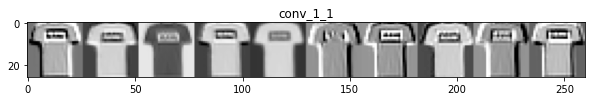

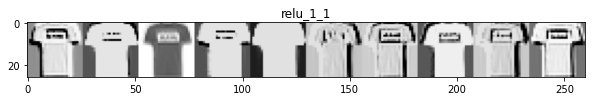

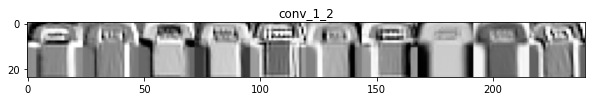

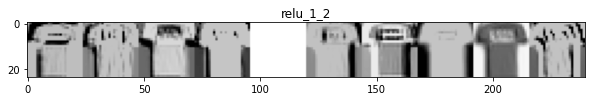

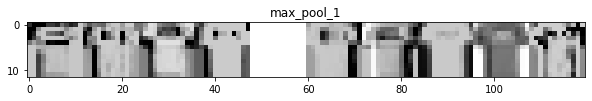

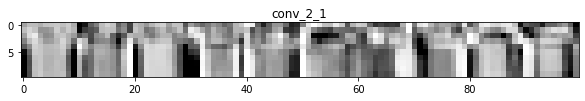

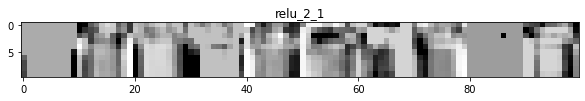

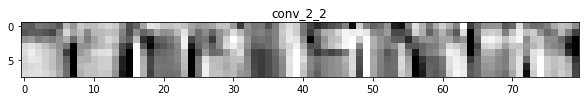

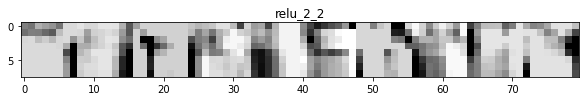

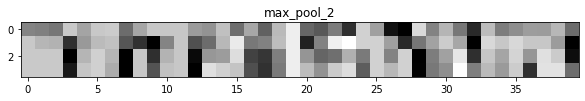

In [ ]:
layer_names = []
for layer in my_model.layers[:-2]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 10

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='Greys')